# Yolov5 Ver2 Train

## 0. Setting

### Goole Drive Connecting

In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2'

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2


In [13]:
ls

benchmarks.py    detect.py   models/           runs/      tutorial.ipynb
classify/        export.py   __pycache__/      segment/   utils/
CONTRIBUTING.md  hubconf.py  README.md         setup.cfg  val.py
data/            LICENSE     requirements.txt  train.py   yolov5s.pt


### Library Call

In [5]:
from glob import glob
import yaml
from IPython.display import Image
import os
import numpy as np
import random

## 1. Download Dataset & Yolov5

### Image Load from roboflow

In [ ]:
%cd dataset

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset


In [ ]:
# Load Dataset URL : https://universe.roboflow.com/joao-cosmo/deepfashion2-modified/dataset/3
# !curl -L "https://universe.roboflow.com/ds/nRfg7zTqGy?key=sSAC9S8YKl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

### Download Yolov5

In [15]:
%cd ..

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2


In [ ]:
# Download Yolov5
# !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13715, done.
remote: Total 13715 (delta 0), reused 0 (delta 0), pack-reused 13715
Receiving objects: 100% (13715/13715), 13.23 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (9451/9451), done.


In [16]:
%cd yolov5/

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/yolov5


In [17]:
# Download packages for yolov5
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Split

In [7]:
cd ..

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2


In [8]:
%cd dataset

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset


In [9]:
ls

data.yaml            test/     train.cache  valid.cache
README.dataset.txt   test.txt  train.txt    valid.txt
README.roboflow.txt  train/    valid/


In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 7
names: ['dress', 'outwear', 'shirt', 'shorts', 'skirt', 'sleeveless', 'trousers']

In [ ]:
train_list = glob('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/train/images/*.jpg')
valid_list = glob('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/valid/images/*.jpg')
test_list = glob('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/test/images/*.jpg')

print('train img num :',len(train_list))
print('valid img num :',len(valid_list))
print('test img num :',len(test_list))

train img num : 7000
valid img num : 2000
test img num : 1000


In [ ]:
with open('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/train.txt','w') as f:
  f.write('\n'.join(train_list) + '\n')

with open('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/valid.txt','w') as f:
  f.write('\n'.join(valid_list) + '\n')

with open('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/test.txt','w') as f:
  f.write('\n'.join(test_list) + '\n')

In [ ]:
with open('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/data.yaml','r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)

print(data)

data['train'] = '/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/valid.txt'

with open('/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/data.yaml','w') as f:
  yaml.dump(data,f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 7, 'names': ['dress', 'outwear', 'shirt', 'shorts', 'skirt', 'sleeveless', 'trousers']}
{'train': '/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/train.txt', 'val': '/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/valid.txt', 'nc': 7, 'names': ['dress', 'outwear', 'shirt', 'shorts', 'skirt', 'sleeveless', 'trousers']}


## 2. Custom Train Yolov5

In [18]:
%cd ..

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2


In [19]:
%cd yolov5

/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/yolov5


In [20]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/drive/MyDrive/"Graduation Project"/YOLOv5_Ver2/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5_version2_result

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/Graduation Project/YOLOv5_Ver2/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5_version2_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Graduation': No such file or directory
YOLOv5 🚀 2022-10-10 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup

## 3. Performance Evaluation

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/"Graduation Project"/YOLOv5_ver2/yolov5/runs/

In [ ]:
random_img_idx = np.random.randint(len(valid_list))
print(random_img_idx)
random_img = valid_list[random_img_idx]

!python detect.py --weights /content/drive/MyDrive/"Graduation Project"/YOLOv5_ver2/yolov5/runs/train/yolov5_ver2_result1/weights/best.pt --img 416 --conf 0.3 --source "{random_img}"

348
detect: weights=['/content/drive/MyDrive/Graduation Project/YOLOv5/yolov5/runs/train/yolov5_ver1_result2/weights/best.pt'], source=/content/drive/MyDrive/Graduation Project/YOLOv5/dataset/valid/images/shirts-----105_jpg.rf.7b65295c7fbf77b3c95ae871f5b0a188.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/Graduation': No such file or directory
YOLOv5 🚀 2022-10-5 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/Graduation Project/YOLOv5/dataset/valid/images/s

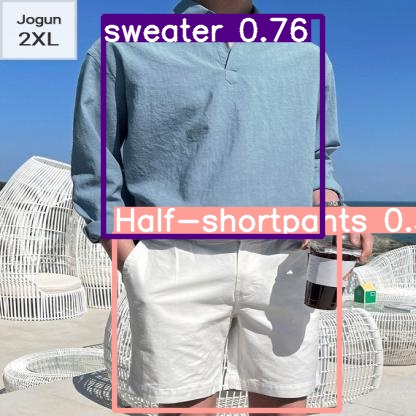

In [ ]:
Image(os.path.join('/content/drive/MyDrive/Graduation Project/YOLOv5/yolov5/runs/detect/exp1', os.path.basename(random_img)))

In [ ]:
!python detect.py --source /content/drive/MyDrive/"Graduation Project"/YOLOv5/video_sample3.mp4 --weights /content/drive/MyDrive/"Graduation Project"/YOLOv5_Ver2/yolov5/runs/train/yolov5_ver2_result2/weights/best.pt --conf 0.3

In [ ]:
!python detect.py --source 0 --weights /content/drive/MyDrive/"Graduation Project"/YOLOv5_Ver2/yolov5/runs/train/yolov5_ver2_result2/weights/best.pt --conf 0.3